# Using Random walker to generate lables and then segment and finally cleanup using closing operation.

In [14]:
import matplotlib.pyplot as plt


from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import exposure
from skimage.segmentation import random_walker


import numpy as np

from scipy import ndimage as nd

In [15]:
img_0 = img_as_float(io.imread("demo.jpg",as_gray=True))

In [16]:
img_1 = img_as_float(io.imread("demo1.jpg",as_gray=True))

# Building Histogram For Finding Two Seperate Peak

(array([1.94e+03, 4.71e+02, 2.10e+02, 1.19e+02, 8.50e+01, 4.60e+01,
        3.60e+01, 2.80e+01, 2.80e+01, 1.40e+01, 1.50e+01, 2.30e+01,
        1.30e+01, 1.80e+01, 6.00e+00, 8.00e+00, 1.00e+01, 7.00e+00,
        6.00e+00, 1.20e+01, 2.00e+00, 1.20e+01, 5.00e+00, 1.30e+01,
        1.10e+01, 1.30e+01, 9.00e+00, 5.00e+00, 1.00e+00, 3.00e+00,
        6.00e+00, 7.00e+00, 7.00e+00, 7.00e+00, 6.00e+00, 5.00e+00,
        2.00e+00, 3.00e+00, 5.00e+00, 6.00e+00, 3.00e+00, 8.00e+00,
        2.00e+00, 5.00e+00, 8.00e+00, 6.00e+00, 6.00e+00, 8.00e+00,
        4.00e+00, 1.00e+00, 9.00e+00, 1.00e+00, 8.00e+00, 4.00e+00,
        1.00e+01, 7.00e+00, 8.00e+00, 4.00e+00, 7.00e+00, 6.00e+00,
        4.00e+00, 4.00e+00, 7.00e+00, 3.00e+00, 1.00e+01, 5.00e+00,
        4.00e+00, 5.00e+00, 7.00e+00, 7.00e+00, 5.00e+00, 8.00e+00,
        1.30e+01, 8.00e+00, 1.10e+01, 2.10e+01, 4.90e+01, 9.80e+01,
        1.11e+02, 1.34e+02, 1.32e+02, 1.47e+02, 1.46e+02, 1.45e+02,
        1.44e+02, 1.18e+02, 8.00e+01, 5.90e+01, 

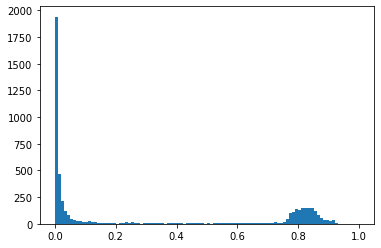

In [17]:
plt.hist(img_0.flat, bins=100, range=(0, 1))

In [18]:
sigma_est_0 = np.mean(estimate_sigma(img_0, multichannel=True))
denoise_img_0 = denoise_nl_means(img_0, h=1.15 * sigma_est_0, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)

(array([2.062e+03, 4.380e+02, 1.470e+02, 1.030e+02, 7.800e+01, 4.400e+01,
        3.500e+01, 2.800e+01, 2.800e+01, 1.400e+01, 1.500e+01, 2.300e+01,
        1.300e+01, 1.800e+01, 6.000e+00, 8.000e+00, 1.000e+01, 7.000e+00,
        6.000e+00, 1.200e+01, 2.000e+00, 1.200e+01, 5.000e+00, 1.300e+01,
        1.100e+01, 1.300e+01, 9.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        6.000e+00, 7.000e+00, 7.000e+00, 7.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 8.000e+00,
        2.000e+00, 5.000e+00, 8.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00, 8.000e+00, 4.000e+00,
        1.000e+01, 7.000e+00, 8.000e+00, 4.000e+00, 7.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 1.000e+01, 5.000e+00,
        4.000e+00, 5.000e+00, 7.000e+00, 7.000e+00, 5.000e+00, 8.000e+00,
        1.300e+01, 8.000e+00, 1.100e+01, 1.800e+01, 4.200e+01, 1.070e+02,
        1.120e+02, 1.280e+02, 1.350e+0

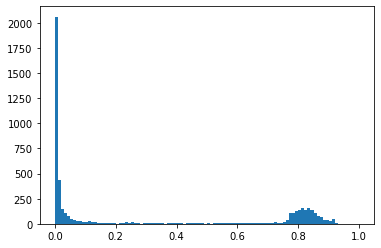

In [19]:
plt.hist(denoise_img_0.flat, bins=100, range=(0, 1)) 

(array([1.958e+03, 5.640e+02, 1.810e+02, 1.290e+02, 8.100e+01, 5.400e+01,
        4.100e+01, 3.800e+01, 3.000e+01, 2.100e+01, 1.400e+01, 1.200e+01,
        1.600e+01, 1.500e+01, 1.100e+01, 1.100e+01, 8.000e+00, 1.200e+01,
        1.400e+01, 8.000e+00, 1.100e+01, 3.000e+00, 5.000e+00, 1.000e+01,
        4.000e+00, 7.000e+00, 5.000e+00, 7.000e+00, 7.000e+00, 5.000e+00,
        1.000e+00, 1.100e+01, 4.000e+00, 1.100e+01, 6.000e+00, 3.000e+00,
        8.000e+00, 1.000e+00, 1.100e+01, 5.000e+00, 7.000e+00, 6.000e+00,
        4.000e+00, 8.000e+00, 7.000e+00, 7.000e+00, 4.000e+00, 4.000e+00,
        8.000e+00, 7.000e+00, 4.000e+00, 1.000e+01, 7.000e+00, 1.200e+01,
        8.000e+00, 1.000e+01, 7.000e+00, 1.600e+01, 1.100e+01, 1.000e+01,
        9.000e+00, 6.000e+00, 1.100e+01, 7.000e+00, 9.000e+00, 8.000e+00,
        1.100e+01, 1.400e+01, 7.000e+00, 9.000e+00, 1.500e+01, 1.100e+01,
        1.800e+01, 1.400e+01, 4.200e+01, 5.100e+01, 8.300e+01, 1.400e+02,
        2.000e+02, 2.060e+02, 1.860e+0

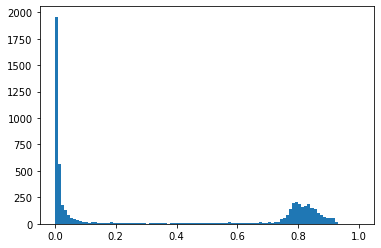

In [20]:
plt.hist(img_1.flat, bins=100, range=(0, 1))

In [21]:
sigma_est_1 = np.mean(estimate_sigma(img_1, multichannel=True))
denoise_img_1 = denoise_nl_means(img_1, h=1.15 * sigma_est_1, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)

/home/cncdragneel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cncdragneel/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(array([1681.,  424.,  105.,   69.,   42.,   56.,   44.,   30.,   39.,
          25.,   40.,   35.,   26.,   29.,   27.,   30.,   25.,   27.,
          18.,   29.,   23.,   23.,   27.,   26.,   24.,   27.,   27.,
          21.,   18.,   26.,   22.,   22.,   23.,   32.,   19.,   27.,
          21.,   30.,   22.,   18.,   22.,   32.,   13.,   24.,   27.,
          23.,   23.,   15.,   30.,   30.,   16.,   19.,   26.,   30.,
          20.,   32.,   18.,   24.,   24.,   35.,   31.,   20.,   34.,
          29.,   21.,   29.,   42.,   26.,   28.,   45.,   52.,   40.,
          56.,   50.,   47.,   51.,   66.,   72.,  134.,  151.,  166.,
         181.,  164.,  134.,  147.,   99.,   51.,   32.,   20.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

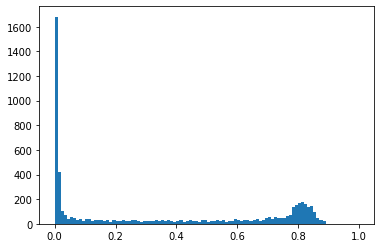

In [22]:
plt.hist(denoise_img_1.flat, bins=100, range=(0, 1)) 

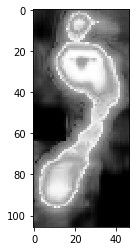

In [23]:
eq_img_0 = exposure.equalize_hist(denoise_img_0)
plt.imshow(eq_img_0, cmap='gray')

(array([2.062e+03, 4.380e+02, 1.470e+02, 1.030e+02, 7.800e+01, 4.400e+01,
        3.500e+01, 2.800e+01, 2.800e+01, 1.400e+01, 1.500e+01, 2.300e+01,
        1.300e+01, 1.800e+01, 6.000e+00, 8.000e+00, 1.000e+01, 7.000e+00,
        6.000e+00, 1.200e+01, 2.000e+00, 1.200e+01, 5.000e+00, 1.300e+01,
        1.100e+01, 1.300e+01, 9.000e+00, 5.000e+00, 1.000e+00, 3.000e+00,
        6.000e+00, 7.000e+00, 7.000e+00, 7.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 8.000e+00,
        2.000e+00, 5.000e+00, 8.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00, 8.000e+00, 4.000e+00,
        1.000e+01, 7.000e+00, 8.000e+00, 4.000e+00, 7.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 1.000e+01, 5.000e+00,
        4.000e+00, 5.000e+00, 7.000e+00, 7.000e+00, 5.000e+00, 8.000e+00,
        1.300e+01, 8.000e+00, 1.100e+01, 1.800e+01, 4.200e+01, 1.070e+02,
        1.120e+02, 1.280e+02, 1.350e+0

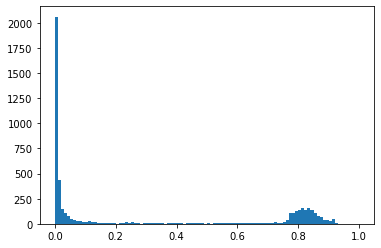

In [24]:
eq_img_0_1 = exposure.equalize_adapthist(denoise_img_0)
plt.hist(denoise_img_0.flat, bins=100, range=(0., 1))

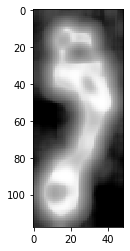

In [25]:
eq_img_1 = exposure.equalize_hist(denoise_img_1)
plt.imshow(eq_img_1, cmap='gray')

(array([1681.,  424.,  105.,   69.,   42.,   56.,   44.,   30.,   39.,
          25.,   40.,   35.,   26.,   29.,   27.,   30.,   25.,   27.,
          18.,   29.,   23.,   23.,   27.,   26.,   24.,   27.,   27.,
          21.,   18.,   26.,   22.,   22.,   23.,   32.,   19.,   27.,
          21.,   30.,   22.,   18.,   22.,   32.,   13.,   24.,   27.,
          23.,   23.,   15.,   30.,   30.,   16.,   19.,   26.,   30.,
          20.,   32.,   18.,   24.,   24.,   35.,   31.,   20.,   34.,
          29.,   21.,   29.,   42.,   26.,   28.,   45.,   52.,   40.,
          56.,   50.,   47.,   51.,   66.,   72.,  134.,  151.,  166.,
         181.,  164.,  134.,  147.,   99.,   51.,   32.,   20.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

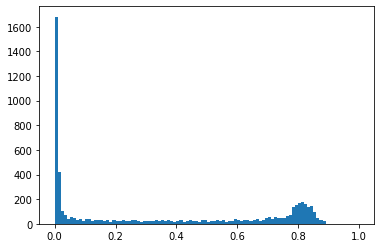

In [26]:
eq_img_1_1 = exposure.equalize_adapthist(denoise_img_1)
plt.hist(denoise_img_1.flat, bins=100, range=(0., 1))

# Marker Include all the Peaks Value

In [27]:
markers_0 = np.zeros(img_0.shape, dtype=np.uint)

In [28]:
markers_0[(eq_img_0_1 < 0.8) & (eq_img_0_1 > 0.7)] = 1
markers_0[(eq_img_0_1 > 0.85) & (eq_img_0_1 < 0.99)] = 2

# Applying Random Walker Algorithm

In [29]:
labels = random_walker(eq_img_0_1, markers_0, beta=10, mode='bf')
plt.imsave("markers_0_1.jpg", markers_0)
segm1_0 = (labels == 1)
segm2_0 = (labels == 2)
all_segments_0 = np.zeros((eq_img_0_1.shape[0], eq_img_0_1.shape[1], 3)) #nothing but denoise img size but blank

all_segments_0[segm1_0] = (1,0,0)
all_segments_0[segm2_0] = (0,1,0)

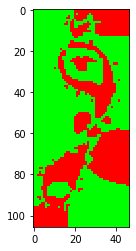

In [30]:
plt.imshow(all_segments_0)

In [31]:
segm1_closed_0 = nd.binary_closing(segm1_0, np.ones((3,3)))
segm2_closed_0 = nd.binary_closing(segm2_0, np.ones((3,3)))

In [32]:
all_segments_cleaned_0 = np.zeros((eq_img_0_1.shape[0], eq_img_0_1.shape[1], 3)) 

In [33]:
all_segments_cleaned_0[segm1_closed_0] = (1,0,0)
all_segments_cleaned_0[segm2_closed_0] = (0,1,0)

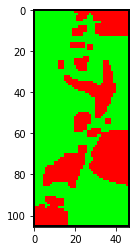

In [34]:
plt.imshow(all_segments_cleaned_0) 
plt.imsave("random_walker_0.jpg", all_segments_cleaned_0)